# Classifying newswires: a multiclass classification

Building Neural network to classify Reuters newswires into 46 mutually exclusive topics. This problem is instance of multi-class classification
because each data-point should be classified into only one category, more specifically single-label, multiclass classification.

Reuters dataset is a set of short newswires and their topics, published by reuters in 1986. There are 46 different topics, some topics are more represented than others, but each topic has at least 10 examples in the training set.

Plan of attack
* Loading the Reuters dataset
* Preparing the data
* Building anf fitting model
* Evaluating and visualizing model
* Repeat till state-of-art model

## Loading the Reuters dataset


In [ ]:
from keras.datasets import reuters

(train_data, train_labels) , (test_data, test_labels) = reuters.load_data(num_words=10000)

len(train_data), len(test_data)

2110848/2110848 [==============================] - 0s 0us/step


(8982, 2246)

The argument num_words=10000 restricts the data to the 10,000 most frequently occuring words found in the data. There 8,982 training and 2,246 test examples

In [ ]:
# view data
train_data[1]

[1,
 3267,
 699,
 3434,
 2295,
 56,
 2,
 7511,
 9,
 56,
 3906,
 1073,
 81,
 5,
 1198,
 57,
 366,
 737,
 132,
 20,
 4093,
 7,
 2,
 49,
 2295,
 2,
 1037,
 3267,
 699,
 3434,
 8,
 7,
 10,
 241,
 16,
 855,
 129,
 231,
 783,
 5,
 4,
 587,
 2295,
 2,
 2,
 775,
 7,
 48,
 34,
 191,
 44,
 35,
 1795,
 505,
 17,
 12]

In [ ]:
# check shape , datatype, dimensions and size of training data
train_data.shape, train_data.dtype, train_data.size, train_data.ndim

((8982,), dtype('O'), 8982, 1)

In [ ]:
# check shape, datatype , dimensions and size of training labels
train_labels.shape, train_labels.dtype, train_labels.size, train_labels.ndim

((8982,), dtype('int64'), 8982, 1)

In [ ]:
train_labels[10]

3

In [ ]:
# check th size of random samples
len(train_data[0]), len(train_data[10]), len(train_data[100])

(87, 31, 409)

### Creating a helper function: Decoding newswires to text

In [ ]:
def decode_newswire(n, data):
  """
  Decodes the newswire indices and returns english text
  """
  word_index = reuters.get_word_index()
  reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
  decoded_newswire = ' '.join ([reverse_word_index.get(i-3, '?')for i in data[n]])
  return decoded_newswire
  # note:indices are offsets by 3 becoz 0,1,2 are reserved indices for padding,start of sequence and unknown

In [ ]:

decode_newswire(n=100, data=train_data)

550378/550378 [==============================] - 0s 0us/step


"? opec believes world oil prices should be set around a fixed average price of 18 dlrs a barrel ? assistant general secretary ? al wattari said today in a speech to a european community ec ? opec seminar in luxembourg released here al wattari said opec believes the world energy trade should be kept without restrictions and should be built around a fixed average price of 18 dlrs but he warned that defense of the 18 dlr a barrel level had caused hardship for opec countries who had been forced to curtail production and he warned that such cutbacks by opec states could not be sustained in some cases for opec to stabilize the world oil price at what is now considered the optimal level of 18 dlrs a barrel its member countries have had to undergo severe hardship in ? production al wattari said such cutbacks cannot in certain cases be sustained al wattari said as well as financial and marketing pressures some states depended on associated gas output for domestic use and oil cutbacks had left 

## Preparing the data
* Vectorize or one hot-encode data
* Splitting training data for validation

In [ ]:

# Encoding the data
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  """
  one-hot encode the data
  """
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

In [ ]:
X_train = vectorize_sequences(train_data) # Vectorize training data
X_test = vectorize_sequences(test_data) # Vectorize the test data

In [ ]:
# onehot encoding labels
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
# Splitting the training data to train and validation data
X_val = X_train[:1000]
partial_x_train = X_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

## Building the neural network
* Build the model
* Compile the model
* Fit the model

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation= "relu", input_shape=(10000,)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(46, activation="softmax")
])

model.compile(
    loss= tf.keras.losses.categorical_crossentropy,
    optimizer= tf.keras.optimizers.Adam(),
    metrics= ["accuracy"]
)

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_val, y_val)
)

Epoch 1/20
16/16 [==============================] - 2s 72ms/step - loss: 3.2801 - accuracy: 0.4456 - val_loss: 2.4958 - val_accuracy: 0.5590
Epoch 2/20
16/16 [==============================] - 1s 54ms/step - loss: 1.9833 - accuracy: 0.5995 - val_loss: 1.6203 - val_accuracy: 0.6460
Epoch 3/20
16/16 [==============================] - 1s 54ms/step - loss: 1.3603 - accuracy: 0.7103 - val_loss: 1.2937 - val_accuracy: 0.7110
Epoch 4/20
16/16 [==============================] - 1s 87ms/step - loss: 1.0443 - accuracy: 0.7770 - val_loss: 1.1466 - val_accuracy: 0.7540
Epoch 5/20
16/16 [==============================] - 2s 135ms/step - loss: 0.8174 - accuracy: 0.8290 - val_loss: 1.0291 - val_accuracy: 0.7880
Epoch 6/20
16/16 [==============================] - 1s 70ms/step - loss: 0.6376 - accuracy: 0.8673 - val_loss: 0.9530 - val_accuracy: 0.8060
Epoch 7/20
16/16 [==============================] - 1s 51ms/step - loss: 0.4964 - accuracy: 0.8960 - val_loss: 0.9034 - val_accuracy: 0.8100
Epoch 8/20
1

## Evaluate and visualize model

In [ ]:
# get summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640064    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 46)                2990      
                                                                 
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


### Helper function to plot curves

In [ ]:
import matplotlib.pyplot as plt

def plot_curve(history):
  """
  Returns accuracy and loss plot
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  acc = history.history["accuracy"]
  val_acc = history.history["val_accuracy"]
  epochs = range(1, len(loss)+ 1)

  # plot loss curve
  plt.plot(epochs, loss, 'bo', label ="Training loss")
  plt.plot(epochs, val_loss, 'r', label="validation loss")
  plt.title("Training and validation loss")
  plt.xlabel("epochs")
  plt.ylabel("loss")
  plt.legend()

  # plot accuracy curve
  plt.figure()
  plt.clf() #clears the figure
  plt.plot(epochs, acc, 'bo', label="Training accuracy")
  plt.plot(epochs, val_acc, 'r', label="validation accuracy")
  plt.title("Training and Validation accuracy")
  plt.xlabel("epochs")
  plt.ylabel("accuracy")
  plt.legend()
  plt.show()

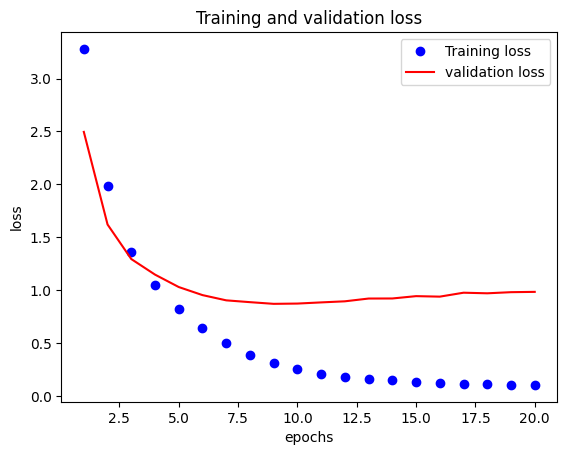

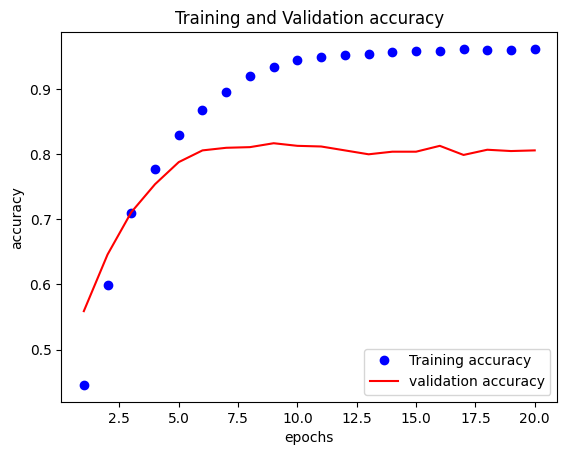

In [ ]:
plot_curve(history)

In [ ]:
evaluate = model.evaluate(X_test, one_hot_test_labels)
evaluate

71/71 [==============================] - 0s 6ms/step - loss: 1.1174 - accuracy: 0.7867


[1.1174100637435913, 0.7867319583892822]

## Repeat until satisified
It seems the model starts to overfit after 9 epochs

In [ ]:
model_1 = tf.keras.models.clone_model(model)

model_1.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer="Adam"
    ,metrics=["accuracy"]
)


In [ ]:
history1= model_1.fit(
    partial_x_train,
    partial_y_train,
    epochs=9,
    validation_data=(X_val, y_val),
    batch_size=512,
    verbose=0)

In [ ]:
evaluate_1 = model_1.evaluate(X_test, one_hot_test_labels)
evaluate_1

71/71 [==============================] - 0s 3ms/step - loss: 1.0356 - accuracy: 0.7947


[1.0356037616729736, 0.7947462201118469]

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation= "relu", input_shape=(10000,)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(46, activation="softmax")
])

model_2.compile(
    loss= tf.keras.losses.categorical_crossentropy,
    optimizer= tf.keras.optimizers.Adam(),
    metrics= ["accuracy"]
)

history_2 = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    verbose=0)

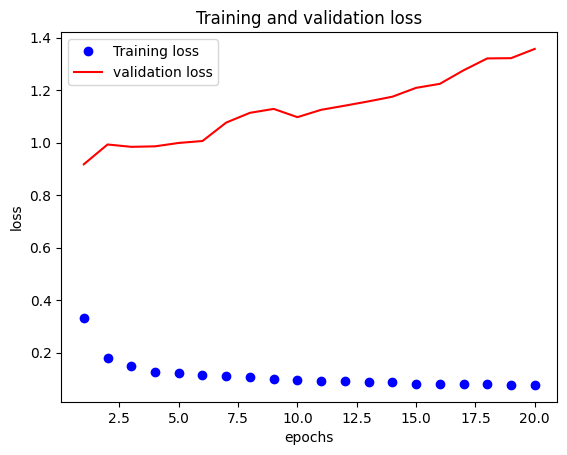

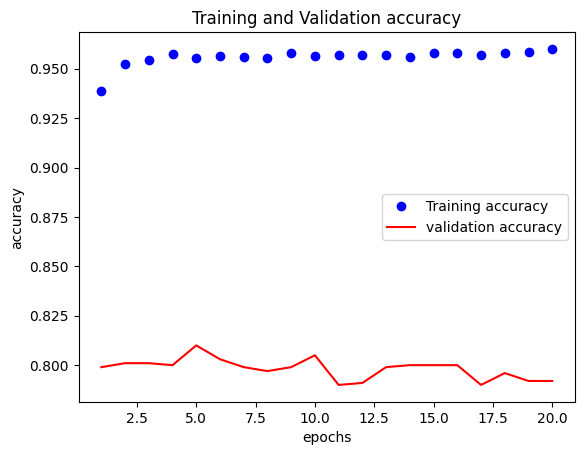

In [ ]:
plot_curve(history_2)

In [ ]:
evaluate_2 = model_2.evaluate(X_test, one_hot_test_labels)

71/71 [==============================] - 1s 8ms/step - loss: 3.8465 - accuracy: 0.0080


Let's create a pandas dataframe to check out the loss and accuracy on test data

In [ ]:
import pandas as pd

df = pd.DataFrame(columns=["model", "accuracy", "loss"])
df["model"] = ["model_0", "model_1", "model_2"]
df["accuracy"] = [evaluate[1], evaluate_1[1], evaluate_2[1]]
df["loss"] = [evaluate[0], evaluate_1[0], evaluate_2[0]]
df

,model,accuracy,loss
0,model_0,0.786732,1.117410
1,model_1,0.794746,1.035604
2,model_2,0.008014,3.846473


It seems `model_1`performs well.. So, let's save it

In [ ]:
# loading model_1
model_1.save("save_model_1")